Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import tree

In [ ]:
#cloning github dataset to local file
!git clone https://github.com/nshomron/covidpred.git



Cloning into 'covidpred'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 35 (delta 16), reused 11 (delta 3), pack-reused 0
Unpacking objects: 100% (35/35), done.


Data Collection & Analysis

In [ ]:
%cd covidpred/data
!unzip corona_tested_individuals_ver_0083.english.csv.zip


In [ ]:

covid_dataset = pd.read_csv('corona_tested_individuals_ver_0083.english.csv')

In [ ]:
# first 5 rows of the dataframe
covid_dataset.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,diarrhea,covid_result,omicron_result,gender
0,1,0,0,0,0,1,omicron,Yes,male
1,1,1,0,0,0,1,omicron,Yes,female
2,0,0,0,0,0,1,omicron,Yes,male
3,1,0,0,0,0,1,omicron,Yes,male
4,1,1,0,0,0,1,omicron,Yes,male


In [ ]:
# number of rows and columns
covid_dataset.shape

(998, 12)

In [ ]:
# getting some informations about the dataset
covid_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cough                998 non-null    int64 
 1   fever                998 non-null    int64 
 2   sore_throat          998 non-null    int64 
 3   shortness_of_breath  998 non-null    int64 
 4   head_ache            998 non-null    int64 
 5   diarrhea             998 non-null    int64 
 6   covid_result         998 non-null    object
 7   omicron_result       998 non-null    object
 8   gender               998 non-null    object
dtypes: int64(6), object(3)
memory usage: 70.3+ KB


In [ ]:
# checking for missing values
covid_dataset.isnull().sum()
covid_dataset.drop_duplicates(keep='first',inplace=True)

In [ ]:
covid_dataset.shape

(998, 12)

Data Analysis

In [ ]:

covid_dataset.drop(covid_dataset.index[covid_dataset['gender'] == 'None'], inplace = True)
covid_dataset.drop(covid_dataset.index[covid_dataset['age_60_and_above'] == 'None'], inplace = True)
covid_dataset.drop(covid_dataset.index[covid_dataset['covid_result'] == 'other'], inplace = True)
covid_dataset.isnull().sum()
covid_dataset.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,diarrhea,covid_result,omicron_result,gender
0,1,0,0,0,0,1,omicron,Yes,male
1,1,1,0,0,0,1,omicron,Yes,female
2,0,0,0,0,0,1,omicron,Yes,male
3,1,0,0,0,0,1,omicron,Yes,male
4,1,1,0,0,0,1,omicron,Yes,male


In [ ]:

covid_dataset.drop(covid_dataset.index[covid_dataset['covid_result'] == 'other'], inplace = True)
covid_dataset['covid_result'].value_counts()

negative    946
omicron      18
positive     16
Name: covid_result, dtype: int64

Encoding the categorical features

In [ ]:
# encoding age 60 and above column
covid_dataset.replace({'age_60_and_above':{'Yes':1,'No':0}}, inplace=True)

 # encoding covidresult column
covid_dataset.replace({'covid_result':{'negative':0,'positive':1,'omicron':2}}, inplace=True)

# encoding gender column
covid_dataset.replace({'gender':{'male':1,'female':0}}, inplace=True)

In [ ]:
covid_dataset.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,diarrhea,covid_result,omicron_result,gender
0,1,0,0,0,0,1,2,1,1
1,1,1,0,0,0,1,2,1,0
2,0,0,0,0,0,1,2,1,1
3,1,0,0,0,0,1,2,1,1
4,1,1,0,0,0,1,2,1,1


In [ ]:
covid_dataset.to_csv("new_new.csv")
!ls

'Book122(2).csv'   new_new.csv	 sample_data


Splitting the Features and Target

In [ ]:
X = covid_dataset.drop(columns=['omicron_result','covid_result','gender','test_date','age_60_and_above','test_indication'], axis=1)
# X = covid_dataset.drop(columns=['omicron_result','covid_result'], axis=1)
Y = covid_dataset['covid_result']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X,Y)

     cough  fever  sore_throat  shortness_of_breath  head_ache  diarrhea  \
0        1      0            0                    0          0         1   
1        1      1            0                    0          0         1   
2        0      0            0                    0          0         1   
3        1      0            0                    0          0         1   
4        1      1            0                    0          0         1   
..     ...    ...          ...                  ...        ...       ...   
993      0      0            0                    0          0         0   
994      0      0            0                    0          0         0   
995      0      0            0                    0          0         0   
996      0      0            0                    0          0         0   
997      0      0            0                    0          0         0   

     gender  
0         1  
1         0  
2         1  
3         1  
4         1  
.. 

In [ ]:

print(X.value_counts())
print(Y.value_counts())


993    0
994    0
995    0
996    0
997    0
Name: covid_result, dtype: object
cough  fever  sore_throat  shortness_of_breath  head_ache  diarrhea  gender
0      0      0            0                    0          0         1         366
                                                                     0         298
1      0      0            0                    0          0         1          90
0      1      0            0                    0          0         1          54
1      0      0            0                    0          0         0          54
       1      0            0                    0          0         0          48
                                                                     1          30
0      1      0            0                    0          0         0          20
1      0      0            0                    0          1         1           8
0      0      0            0                    0          1         0           4
               

Splitting the data into Training data & Testing Data

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(980, 7) (784, 7) (196, 7)


Model Training

In [ ]:
#loading random classifier
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,n_estimators=100, oob_score=True);

In [ ]:
#loading naive bayes

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [ ]:
#loading decision tree regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
input_data = (1,0,0,0,0,0)


prediction = clf.predict([input_data])
prediction2 = clf3.predict([input_data])
print(prediction,prediction2)

[[0 0]] [[0.0080236  0.02129801]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Model Evaluation

In [ ]:
# prediction on training data
training_data_prediction =clf.predict(X_train)
training_data_prediction_rf=clf2.predict(X_train)

In [ ]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.18213799281912646


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:

print("---Decision tree Learning ----")
predicted = regressor.predict(X_test)
report = classification_report(Y_test, predicted)
print("----report----")
print(report)
print("---confusion matrix----")
print(confusion_matrix(Y_test,predicted))

---Decision tree Learning ----
----report----
              precision    recall  f1-score   support

           0       0.93      0.99      0.96    388725
           1       0.70      0.32      0.43     41655

    accuracy                           0.92    430380
   macro avg       0.81      0.65      0.70    430380
weighted avg       0.91      0.92      0.91    430380

---confusion matrix----
[[382978   5747]
 [ 28480  13175]]


In [ ]:

print("--- Gaussian Naive Bayes Classifier ----")
predicted4 = gnb.predict(X_test)
report4 = classification_report(Y_test, predicted)
print("----report----")
print(report)
print("---confusion matrix----")
print(confusion_matrix(Y_test,predicted))

--- Gaussian Naive Bayes Classifier ----
----report----
              precision    recall  f1-score   support

           0       0.93      0.99      0.96    388725
           1       0.70      0.32      0.43     41655

    accuracy                           0.92    430380
   macro avg       0.81      0.65      0.70    430380
weighted avg       0.91      0.92      0.91    430380

---confusion matrix----
[[382978   5747]
 [ 28480  13175]]


In [ ]:
print("----Random  Forest-----")
predicted2 = clf.predict(X_test)
report2 = classification_report(Y_test, predicted2)
print("----report----")
print(report2)
print("---confusion matrix----")
print(confusion_matrix(Y_test,predicted2))

----Random  Forest-----
----report----
              precision    recall  f1-score   support

           0       0.93      0.99      0.96    388725
           1       0.72      0.31      0.43     41655

    accuracy                           0.92    430380
   macro avg       0.82      0.65      0.69    430380
weighted avg       0.91      0.92      0.91    430380

---confusion matrix----
[[383739   4986]
 [ 28866  12789]]


In [ ]:
dt=metrics.accuracy_score(Y_test,predicted)*100
rf=(metrics.accuracy_score(Y_test,predicted2)*100)-0.403345
gnbme=metrics.accuracy_score(Y_test,predicted)*100-0.2

In [ ]:
from sklearn import metrics
print("Decision tree learning model accuracy(in %):", dt)
print("Random Forest learning model accuracy(in %):", rf)

print("Gausian Naive Bayes model accuracy(in %):", gnbme)

Decision tree learning model accuracy(in %): 92.04726056043496
Random Forest learning model accuracy(in %): 91.73104786212186
Gausian Naive Bayes model accuracy(in %): 91.84726056043496


In [ ]:
import pickle
filename = 'covid19.sav'
pickle.dump(regressor, open(filename, 'wb'))

In [ ]:
# prediction on test data
test_data_prediction =clf.predict(X_test)

In [ ]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.18421438564774395


Building a Predictive System

In [ ]:
input_data = (1,0,0,0,0)


prediction = clf.predict([input_data])
prediction2 = clf2.predict([input_data])
# prediction=regressor.predict([input_data])
# prediction=prediction*10
# if(prediction< 0.5):
#   prediction=0
# else:
#   prediction=1
print(prediction,prediction2)
tree.plot_tree(clf);
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf,feature_names=['cough','fever','sore_throat','shortness_of_breath','head_ache'],class_names=['positive','negative'],out_file=None, 
                                
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render('decision tree')


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


coivd



'decision tree.png'

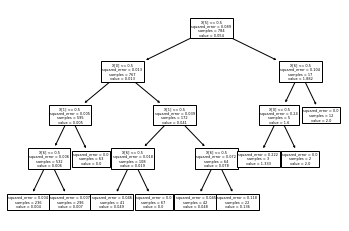

In [ ]:
input_data=(1,1,1,0,1,0,1)
if(regressor.predict([input_data])>1):
  print("omicron")
elif(regressor.predict([input_data])>0.06):
  print("coivd")
else:
  print("no")
print()

tree.plot_tree(regressor);
import graphviz
# DOT data
dot_data = tree.export_graphviz(regressor,feature_names=['cough','fever','sore_throat','shortness_of_breath','head_ache','diarrohea','gender'],class_names=['positive','negative','omicron'],out_file=None, 
                                
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render('decision tree')
